# Problem



```
Przewidzenie wieku abalona na podstawie jego cech fizycznych.
Analiza różnych wariantów klasyfikatorów.
```



# Dane



```
Dane pochodzą z serwisu UC Irvine ML Repository, zawierają informacje dotyczące muszli abalona
https://archive.ics.uci.edu/dataset/1/abalone
```



## Opis danych

Posiadamy dane rzeczywiste dotyczące cech fizycznych mięczaka abalona. Dane opisane są 9 atrybutami. Tworzmy atrybut decyzyjny "Age" (to nasz target czyli wiek w latach) na podstawie wartości z kolumny "Rings" +1.5.

```
Input variables:
1.Sex / nominal / -- / M, F, and I (infant)
2.Length / continuous / mm / Longest shell measurement
3.Diameter/ continuous / mm / perpendicular to length
4.Height / continuous / mm / with meat in shell
5.Whole weight / continuous / grams / whole abalone
6.Shucked weight / continuous	 / grams / weight of meat
7.Viscera weight / continuous / grams / gut weight (after bleeding)
8.Shell weight / continuous / grams / after being dried
9.Rings / integer / -- / +1.5 gives the age in years

Output variables:
10.Age / integer / age in years
```



# Importowanie bibliotek

In [10]:
#!pip install scikit-learn
#!pip install xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

# Wczytanie danych

In [11]:
path = "abalone.data"
# plik wejściowy nie ma nazw kolumn, poniżej dodajemy nazwy atrybutów do całego pliku

columns = ["Sex","Length","Diameter","Height", "Whole_weight", "Shucked_weight", "Viscera_weight", "Shell_weight","Rings"]
data = pd.read_csv(path, header = None, names = columns)
data.head(5)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Eksploracja danych

In [12]:
data.shape # liczba wierszy, kolumn

(4177, 9)

In [13]:
print(data.columns) # atrybuty

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')


In [14]:
data.info() # info. o danych, ilość rekordów niepustych, typy danych
data.isnull().sum() # nie ma wartości NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [15]:
# tworzymy nasz target - atrybut decyzyjny "Age" na podstawie wartości z kolumny "Rings" powiększonych o +1.5
data["Age"] = data["Rings"] + 1.5

In [16]:
data

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


Age
10.5    689
11.5    634
9.5     568
12.5    487
8.5     391
13.5    267
7.5     259
14.5    203
15.5    126
6.5     115
16.5    103
17.5     67
18.5     58
5.5      57
19.5     42
20.5     32
21.5     26
4.5      15
22.5     14
24.5      9
23.5      6
28.5      2
25.5      2
2.5       1
27.5      1
30.5      1
3.5       1
26.5      1
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

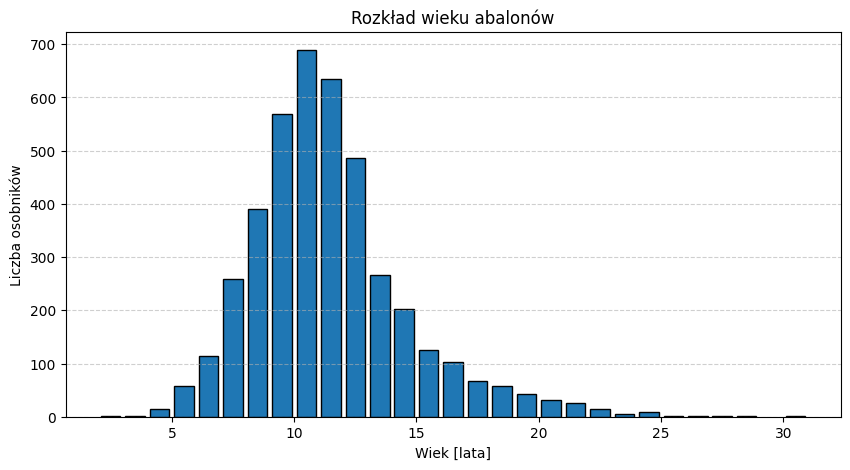

In [17]:
# Rozkład atrybutu "Age"
age_counts = data["Age"].value_counts()
print(age_counts)

# wykres rozkładu wieku
plt.figure(figsize = (10,5))
plt.bar(age_counts.index, age_counts.values, edgecolor = "black")
plt.title("Rozkład wieku abalonów", fontsize = 12)
plt.xlabel("Wiek [lata]", fontsize = 10)
plt.ylabel("Liczba osobników", fontsize = 10)
#plt.xticks(rotation = 45)
plt.grid(axis="y", linestyle="--", alpha = 0.6)
plt.show

Wykres przedstawia prawoskośny rozkład abalonów, gdzie dominują osobniki młode w wieku ok. 9-12 lat, a liczba starszych osobników systematycznie maleje.

# Preprocessing

Dane są "czyste" i nie wymagają preprocessingu.

In [18]:
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
 9   Age             4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
Age               0
dtype: int64

# Transformacja danych

In [19]:
data.select_dtypes(include=["object"]) # kolumna z danymi dyskretnymi
'''# zamieniamy dane kategoryczne na dane numeryczne używając LabelEncoder()
le_list = []

le = LabelEncoder()
data["Sex_encoded"] = le.fit_transform(data["Sex"])
le_list.append(le)

print(data["Sex_encoded"])'''

# OneHotEncoding
data = pd.get_dummies(data,columns=["Sex"], drop_first = True)
print(data)

      Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell_weight  Rings   Age  Sex_I 

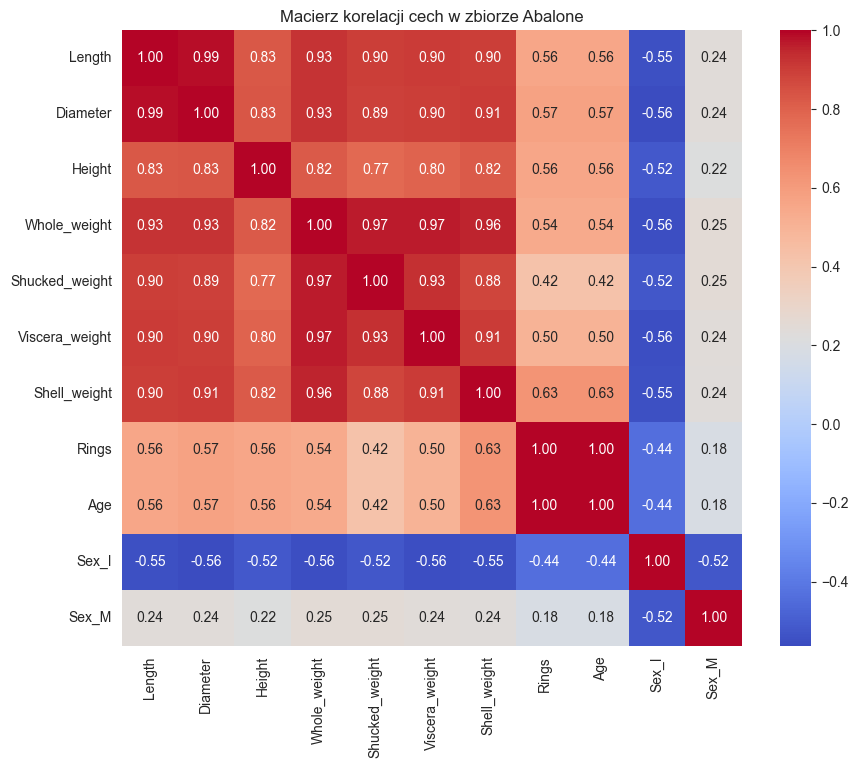

In [20]:
# analiza korelacji cech

corr = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot =True, cmap="coolwarm", fmt=".2f")
plt.title("Macierz korelacji cech w zbiorze Abalone")
plt.show()


# Uczenie

Szukamy najlepszego algorytmu dla naszego przypadku

In [21]:
# Podział danych na X i y
X = data.drop(columns = ["Age","Rings"])
y = data["Age"]

In [22]:
# można ewentualnie przeskalować dane za pomocą StandardScaler,
# ale nie jest to konieczne bo modele drzewiaste dzielą dane wg. progów.
# skalujemy tylko X
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
'''

'\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nX_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)\n'

## Train & Test

In [23]:
X_tr,X_te,y_tr,y_te = train_test_split(X,y, test_size=0.3, random_state = 42)

In [24]:
# tworzymy słownik modeli
reg_dict = {
    "DTR 9  " : DecisionTreeRegressor(max_depth=9),
    "DTR 4  " : DecisionTreeRegressor(max_depth=4),
    "RFR    " : RandomForestRegressor(),
    "RFR 200" : RandomForestRegressor(n_estimators=200),
    "RFR 600" : RandomForestRegressor(n_estimators=600,
                                      max_depth = 12),
    "ETR    " : ExtraTreesRegressor(),
    "XGB    " : XGBRegressor(n_estimators = 2000,
                             learning_rate = 0.03,
                             max_depth = 5,
                             subsample =0.8,
                             colsample_bytree = 0.8,
                             random_state =42)
}

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [26]:
# szukamy najlepszego modelu

best_reg = ("Brak", None, -np.inf) # -np.inf czyli "minus nieskończoność"

for name, reg in reg_dict.items():
    print()
    print("Model", name)

    # trening
    reg.fit(X_tr,y_tr)
    y_pred = reg.predict(X_te)

    # metryki
    mae = mean_absolute_error(y_te,y_pred)
    rmse = np.sqrt(mean_squared_error(y_te,y_pred))
    r2 = r2_score(y_te, y_pred)
    print()

    print(f"MAE: {mae:.3f}\nRMSE: {rmse:.3f}\nR²: {r2:.3f}")

    # zapamiętujemy najlepszy model (największe r2)
    if r2> best_reg[2]:
        best_reg = (name,reg,r2)

print(f"\nNajlepszy model: {best_reg[0]}")




Model DTR 9  

MAE: 1.717
RMSE: 2.527
R²: 0.371

Model DTR 4  

MAE: 1.666
RMSE: 2.328
R²: 0.466

Model RFR    

MAE: 1.550
RMSE: 2.190
R²: 0.528

Model RFR 200

MAE: 1.554
RMSE: 2.197
R²: 0.524

Model RFR 600

MAE: 1.538
RMSE: 2.179
R²: 0.533

Model ETR    

MAE: 1.577
RMSE: 2.207
R²: 0.520

Model XGB    

MAE: 1.608
RMSE: 2.286
R²: 0.485

Najlepszy model: RFR 600


# Budowanie ostatecznego modelu, walidacja, wizualizacja, zapis do pliku

In [27]:
reg = reg_dict[best_reg[0]]

# do wizualizacji danych potrzbujemy rzeczywistych i
# przewidzianych wyników, wybieramy więc model i trenujemy
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

# trenowanie
reg.fit(X_train,y_train)
y_predict = reg.predict(X_test)

# walidacja
print(f"R²: {r2_score(y_test,y_predict)}")

R²: 0.5414133355648828


## Wizualiazcja wyników

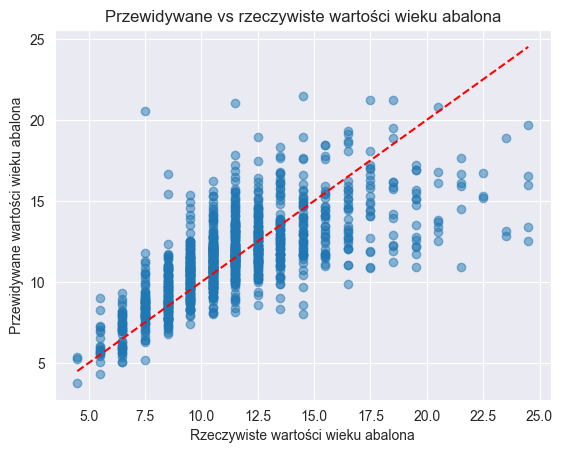

In [28]:
# wykres przewidywane vs rzeczywiste wartości

plt.scatter(y_te, y_pred, alpha=0.5)
plt.plot([y_te.min(), y_te.max()],
         [y_te.min(), y_te.max()], "r--")
plt.xlabel("Rzeczywiste wartości wieku abalona")
plt.ylabel("Przewidywane wartości wieku abalona")
plt.title("Przewidywane vs rzeczywiste wartości wieku abalona")
plt.show()


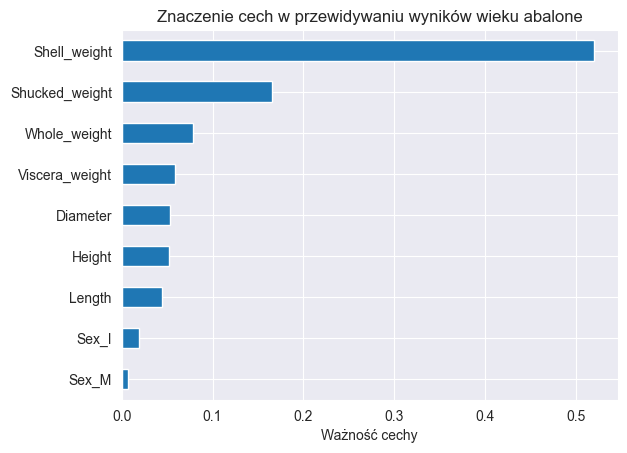

In [29]:
# wykres ważności cech (oparty na Gini/Impurity based importance)
# - o ile dana cecha zmieniejsza nieuporządkowanie (np. miare entropi) podczas podziału w węzłach
importance = reg.feature_importances_ # pobranie ważności cech z modelu
features = X.columns # nazwy cech
pd.Series(importance, index = features).sort_values().plot(kind ="barh")
plt.title("Znaczenie cech w przewidywaniu wyników wieku abalone")
plt.xlabel("Ważność cechy")
plt.show()

## Budowanie ostatecznego modelu

In [30]:
# budowanie ostatecznego modelu
reg.fit(X,y) # trenujemy na całym zbiorze

# mamy wytrenowany klasyfikator do używania
new_data = X.sample(1)

results = reg.predict(new_data)

# wynik
print(results)

[12.89009622]


# Zapis modelu do pliku oraz odczyt

In [31]:
from joblib import dump, load

# zapis wytrenowanego modelu do pliku
dump(reg, "model_age_of_abalone.joblib")

# odczyt modelu z pliku
loaded_model = load("model_age_of_abalone.joblib")

# użycie modelu
new_data_test = X[:5]
print(loaded_model.predict(new_data_test))

[14.19277094  8.7801383  11.72891943 11.15233945  8.1479699 ]
